In [1]:
%%capture
import delfi.distribution as dd
import delfi.utils.io as io
import numpy as np
import pickle

import delfi.inference as infer
import delfi.generator as dg
from delfi.simulator import GaussMixture
import delfi.summarystats as ds

%run -i ../DDELFI.py

def run_panel_b(algo, seed, rounds=5, n_train=[200, 1000], reinit_weights=False, return_abs=False):
    n_params = 1
    m = GaussMixture(dim=n_params, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
    p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
    s = ds.Identity()
    g = dg.Default(model=m, prior=p, summary=s)

    obs = np.array([[5.]])
    kwargs = {'generator': g, 
              'reg_lambda': 0.01,
              'n_components': 2, 
              'n_hiddens': [20], 
              'verbose' : True,
              'obs': obs.copy(),
              'seed': seed}
    
    cbk_feature_layer=0
    
    train = []
    for r in range(rounds):
        train.append(n_train[0])
    train[-1] = n_train[-1]

    
    round_cl=999
    minibatch=100
    n_gradients = 100000
    epochs = [n_gradients // (n_train//minibatch) for n_train in train]
    
    optim_data = None
    print('n_train :', train)
    print('epochs :', epochs)
    
    if algo == 'CDELFI':
        inf = infer.CDELFI(**kwargs)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,         
                                              n_rounds=len(train),
                                              epochs=epochs)
    elif algo == 'SNPE':
        inf = infer.SNPE(**kwargs,convert_to_T=None, reinit_weights=reinit_weights)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,                                              
                                              n_rounds=len(train),
                                              epochs=epochs, 
                                              round_cl=round_cl)        
    elif algo == 'kSNPE':
        inf = infer.SNPE(**kwargs,convert_to_T=None, reinit_weights=reinit_weights)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,                                              
                                              n_rounds=len(train),
                                              epochs=epochs, 
                                              kernel_loss='x_kl', 
                                              cbk_feature_layer=cbk_feature_layer,
                                              round_cl=round_cl)       
    elif algo == 'DDELFI':
        inf = DDELFI(**kwargs,convert_to_T=None, reinit_weights=reinit_weights)
        log, train_data, posteriors, optim_data = inf.run(n_train=train,
                                              minibatch=minibatch,                                              
                                              n_rounds=len(train),
                                              epochs=epochs)       
    else:
        raise ValueError
        
    try:
        posterior = inf.predict(obs)
    except:
        posterior = None
    
    return {'algo': algo,
            'rounds': rounds,
            'seed': seed,
            'posterior': posterior,
            'log': log,
            'obs' : obs, 
            'train_data': train_data,
            'posteriors': posteriors,
            'network' : inf.network,
            'stats_std' : inf.stats_std,
            'stats_mean' : inf.stats_mean,
            'optim_data' : optim_data,
            'cbk_feature_layer' : cbk_feature_layer
           }


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

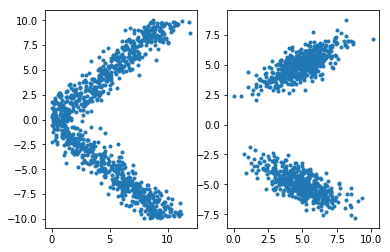

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

p_true = dd.MoG(a=[0.5, 0.5], ms=[np.asarray([5.]), np.asarray([-5.])], Ss=[1.0*np.eye(1), 1.0*np.eye(1)])
seed=42

return_abs = True

m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_data = g.gen(1000)
plt.subplot(1,2,1)
plt.plot(trn_data[1], trn_data[0], '.')

m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = p_true
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_data = g.gen(1000)
plt.subplot(1,2,2)
plt.plot(trn_data[1], trn_data[0], '.')

plt.show()

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01400638]: : 11it [00:00, 67.19it/s] 

loss=[-0.00627184]: : 1301it [00:09, 132.93it/s]   


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00916934]: : 11it [00:00, 67.43it/s] 

loss=[-0.01986861]: : 1088it [00:08, 125.13it/s]


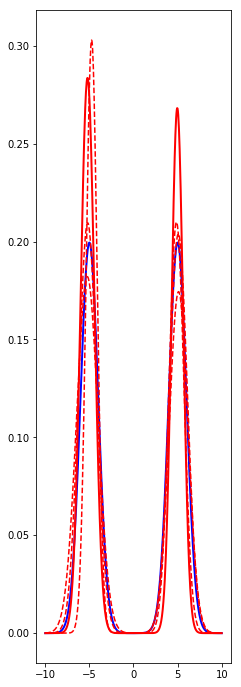

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.03514528]: : 13it [00:00, 77.82it/s] 

loss=[ 0.01530123]: : 1341it [00:10, 125.58it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01218915]: : 13it [00:00, 76.56it/s] 

loss=[-0.01847124]: : 1091it [00:08, 128.88it/s]


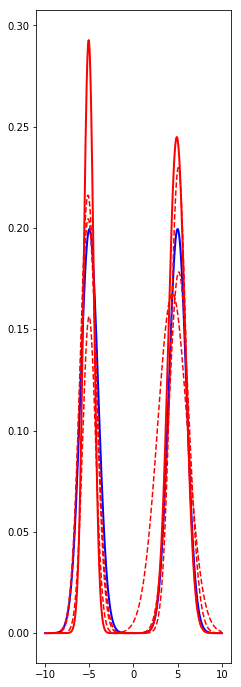

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.95858645]: : 15it [00:00, 87.52it/s] 

loss=[ 0.90112448]: : 1100it [00:07, 140.06it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.04939175]: : 16it [00:00, 109.98it/s]

loss=[-0.07450676]: : 1245it [00:09, 134.72it/s]


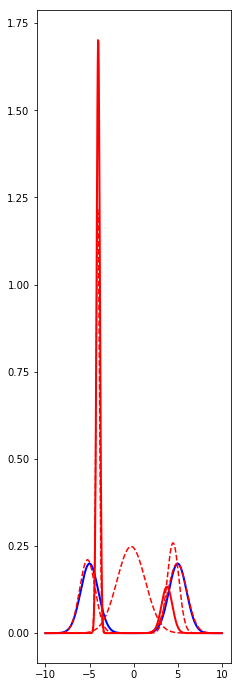

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00154424]: : 15it [00:00, 111.32it/s]

loss=[-0.00239325]: : 1091it [00:07, 144.19it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0029366]: : 15it [00:00, 87.70it/s]  

loss=[-0.00067854]: : 1096it [00:07, 143.88it/s]   


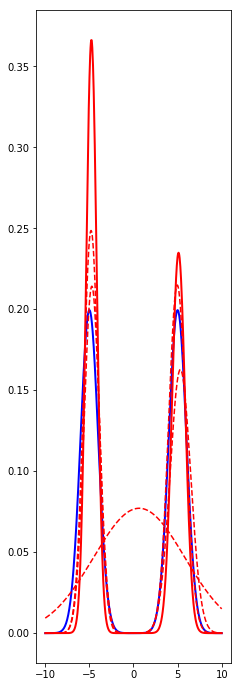

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 1.32646799]: : 17it [00:00, 99.36it/s] 

loss=[ 1.2631197]: : 1137it [00:07, 155.58it/s] 


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.18870306]: : 16it [00:00, 108.80it/s]

loss=[ 0.02209949]: : 10544it [01:10, 149.46it/s]


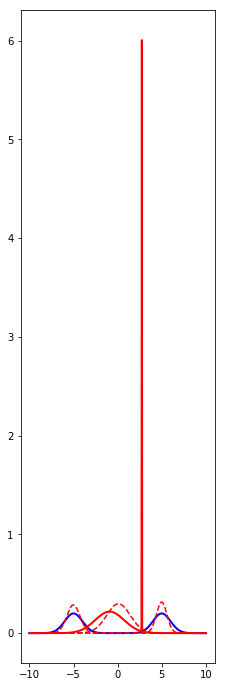

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00018024]: : 14it [00:00, 104.63it/s]

loss=[-0.02105737]: : 1201it [00:07, 161.04it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00630093]: : 14it [00:00, 83.25it/s] 

loss=[ 0.00573111]: : 1083it [00:07, 143.39it/s]


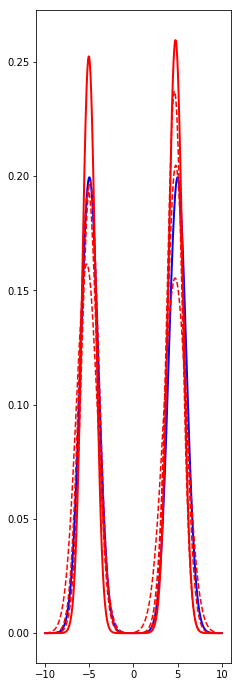

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00567055]: : 14it [00:00, 81.98it/s] 

loss=[-0.01267147]: : 1135it [00:07, 146.46it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02226472]: : 15it [00:00, 113.13it/s]

loss=[ 0.00603104]: : 1153it [00:07, 154.12it/s]


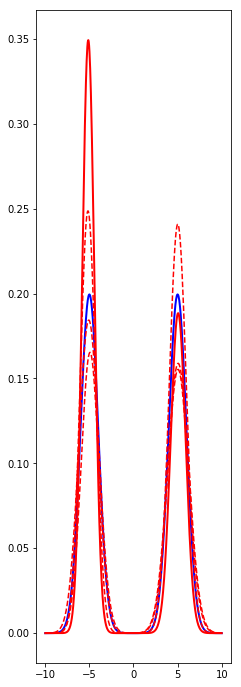

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02364516]: : 14it [00:00, 107.16it/s]

loss=[ 0.01720238]: : 1109it [00:07, 143.28it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.02435851]: : 16it [00:00, 93.69it/s] 

loss=[-0.02486515]: : 1109it [00:08, 138.23it/s]


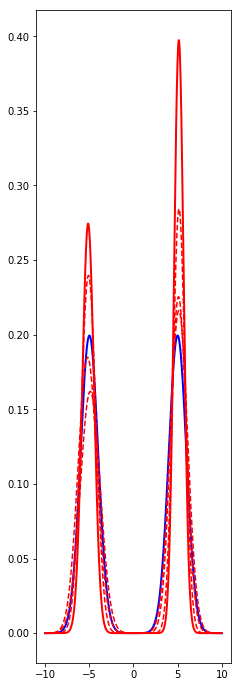

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.06440163]: : 17it [00:00, 103.39it/s]

loss=[ 0.04149318]: : 3541it [00:22, 157.41it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.05636597]: : 17it [00:00, 115.25it/s]

loss=[ 0.05482078]: : 1096it [00:07, 154.80it/s]


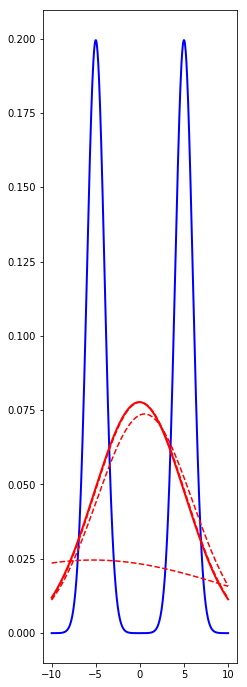

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.89655757]: : 18it [00:00, 124.12it/s]

loss=[ 0.79359412]: : 1191it [00:07, 164.52it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.12623739]: : 16it [00:00, 109.15it/s]

loss=[-0.01562786]: : 1887it [00:12, 152.42it/s]    


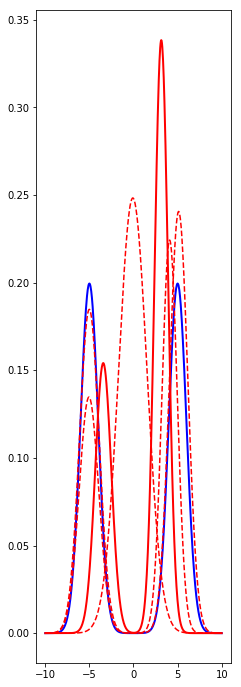

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01479936]: : 16it [00:00, 112.13it/s]

loss=[-0.00800323]: : 1119it [00:07, 151.14it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00159431]: : 14it [00:00, 104.91it/s]

loss=[-0.0015254]: : 1075it [00:08, 128.46it/s]   


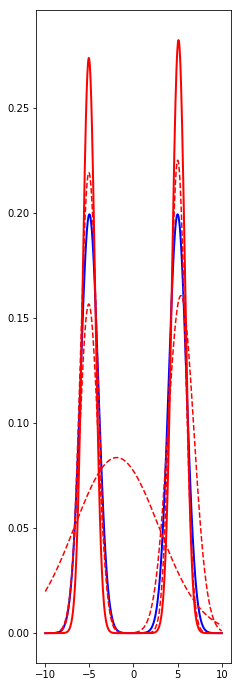

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.02006221]: : 15it [00:00, 91.47it/s] 

loss=[-0.0201602]: : 1097it [00:07, 144.53it/s] 


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02942634]: : 16it [00:00, 122.12it/s]

loss=[ 0.00050306]: : 1111it [00:08, 135.59it/s]


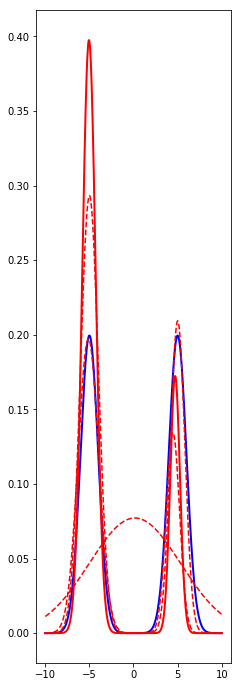

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00120378]: : 14it [00:00, 83.70it/s] 

loss=[-0.01830244]: : 1585it [00:10, 154.01it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01291537]: : 15it [00:00, 89.24it/s] 

loss=[ 0.00697279]: : 1088it [00:07, 149.46it/s]


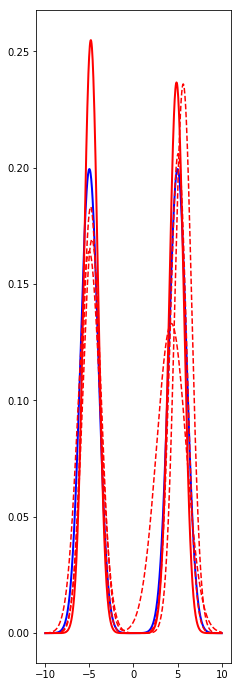

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00220275]: : 15it [00:00, 106.96it/s]

loss=[ 0.00186515]: : 1094it [00:07, 142.85it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00351739]: : 15it [00:00, 116.34it/s]

loss=[-0.01376104]: : 1134it [00:07, 153.00it/s]


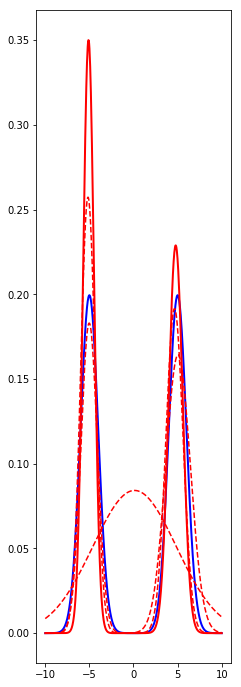

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.04343915]: : 15it [00:00, 88.96it/s] 

loss=[ 0.0370748]: : 1114it [00:07, 142.58it/s] 


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00011873]: : 14it [00:00, 105.08it/s]

loss=[-0.01015568]: : 1115it [00:07, 142.23it/s]


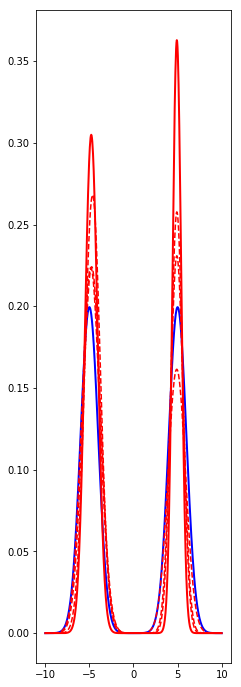

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.04689789]: : 14it [00:00, 83.23it/s] 

loss=[ 0.03323555]: : 1214it [00:08, 145.82it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0149169]: : 14it [00:00, 97.34it/s]  

loss=[ 0.00914717]: : 1103it [00:08, 130.39it/s]


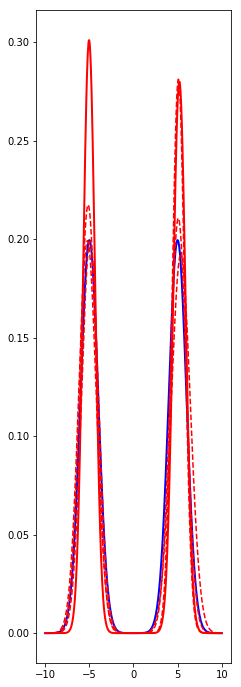

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00169659]: : 14it [00:00, 84.22it/s] 

loss=[-0.00213099]: : 1098it [00:08, 124.48it/s]  


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02458525]: : 15it [00:00, 89.06it/s] 

loss=[ 0.01225853]: : 1230it [00:08, 146.41it/s]


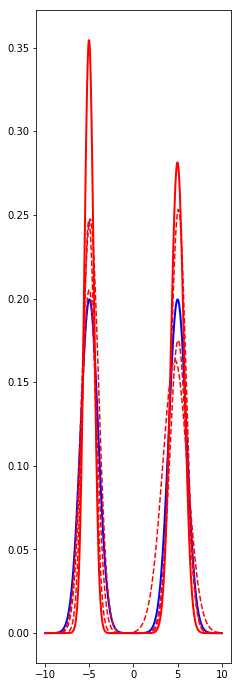

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 1.11329842]: : 17it [00:00, 102.00it/s]

loss=[ 1.06344891]: : 1112it [00:07, 157.53it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.46442986]: : 16it [00:00, 107.65it/s]

loss=[ 0.37593365]: : 21626it [02:17, 157.81it/s]


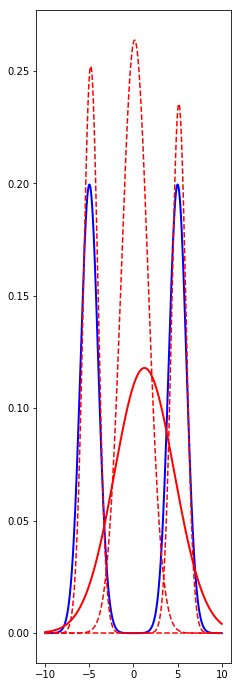

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00144362]: : 16it [00:00, 119.94it/s]

loss=[-0.00674152]: : 1112it [00:07, 139.01it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00381422]: : 14it [00:00, 96.31it/s] 

loss=[-0.01878643]: : 1165it [00:08, 143.24it/s]


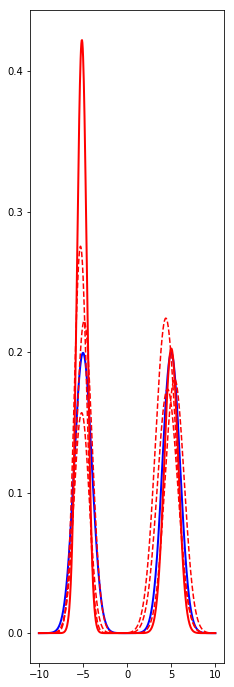

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0337615]: : 15it [00:00, 120.51it/s] 

loss=[ 0.01774263]: : 1152it [00:08, 139.07it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.03123736]: : 14it [00:00, 103.16it/s]

loss=[ 0.01517892]: : 1190it [00:07, 163.82it/s]


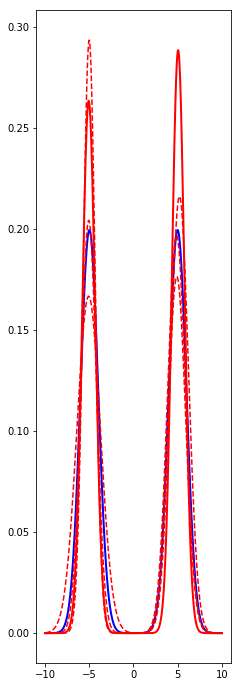

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0067544]: : 16it [00:00, 93.57it/s]  

loss=[-0.00702524]: : 1511it [00:09, 163.61it/s]   


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00508094]: : 17it [00:00, 101.65it/s]

loss=[-0.00523305]: : 1249it [00:08, 152.09it/s]   


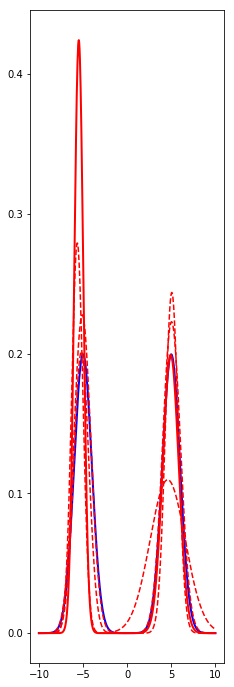

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00276375]: : 15it [00:00, 88.90it/s]      

loss=[-0.00375199]: : 1102it [00:07, 144.11it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00561261]: : 16it [00:00, 121.59it/s]

loss=[-0.0086937]: : 1102it [00:07, 138.98it/s] 


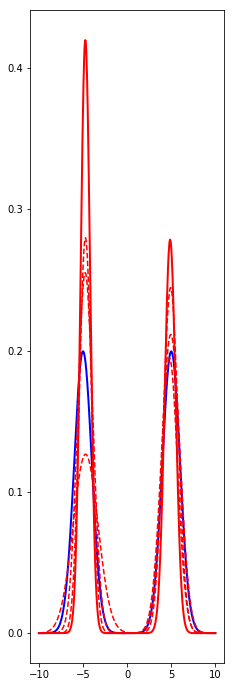

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01510692]: : 15it [00:00, 88.89it/s] 

loss=[ 0.01109862]: : 1115it [00:07, 152.18it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0067234]: : 14it [00:00, 92.31it/s]  

loss=[-0.0107379]: : 1141it [00:07, 160.66it/s] 


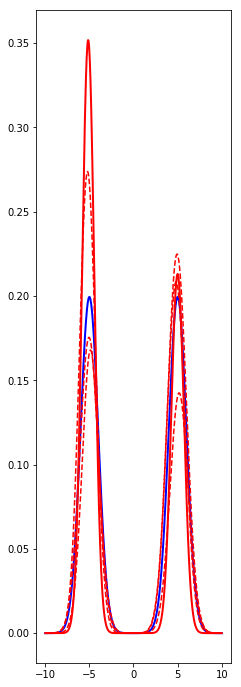

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01590729]: : 17it [00:00, 99.66it/s] 

loss=[-0.01623678]: : 1104it [00:07, 154.28it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0315764]: : 17it [00:00, 101.10it/s] 

loss=[ 0.01025486]: : 1392it [00:08, 164.99it/s]


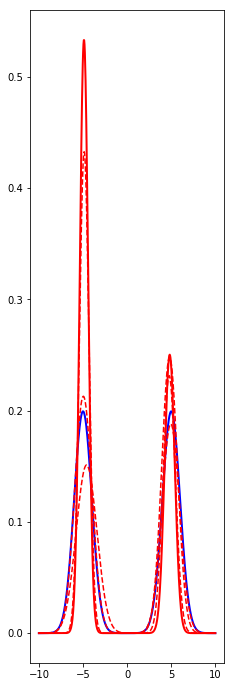

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01650667]: : 15it [00:00, 88.60it/s] 

loss=[ 0.01190114]: : 1111it [00:07, 144.67it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01700878]: : 15it [00:00, 102.23it/s]

loss=[ 0.00486994]: : 1151it [00:07, 160.97it/s]


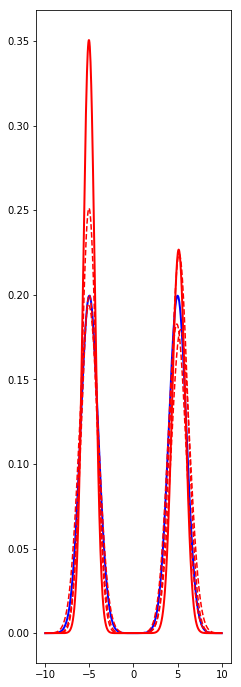

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0027082]: : 18it [00:00, 103.89it/s] 

loss=[ 0.00268221]: : 1092it [00:06, 164.27it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0371089]: : 18it [00:00, 103.97it/s] 

loss=[ 0.01558542]: : 1537it [00:09, 161.99it/s]


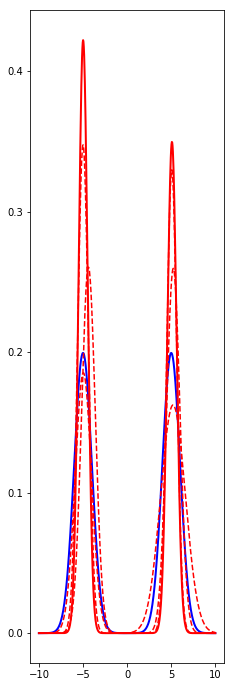

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01475739]: : 18it [00:00, 131.57it/s]

loss=[ 0.00401545]: : 1129it [00:06, 165.45it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02447844]: : 16it [00:00, 93.53it/s] 

loss=[ 0.023839]: : 1100it [00:07, 152.99it/s]  


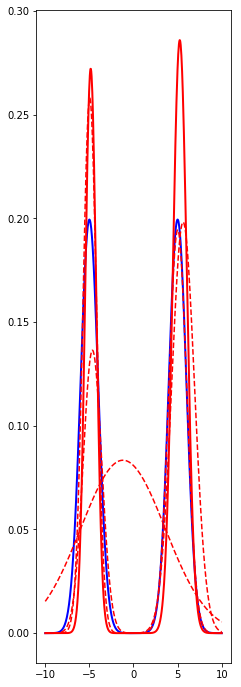

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0098176]: : 16it [00:00, 94.95it/s]  

loss=[ 0.00910354]: : 1107it [00:07, 149.63it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.02914786]: : 15it [00:00, 87.48it/s] 

loss=[-0.03450251]: : 1113it [00:07, 145.25it/s]


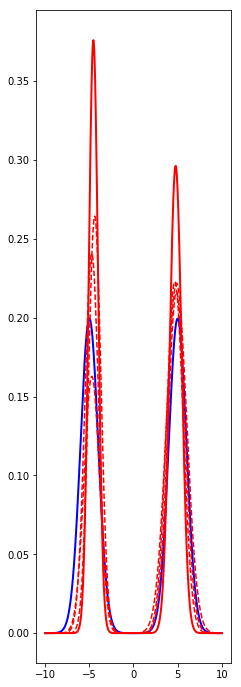

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02436066]: : 16it [00:00, 94.38it/s] 

loss=[ 0.0146966]: : 1297it [00:09, 142.36it/s] 


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01702213]: : 17it [00:00, 98.34it/s] 

loss=[-0.01704741]: : 1087it [00:06, 159.39it/s]


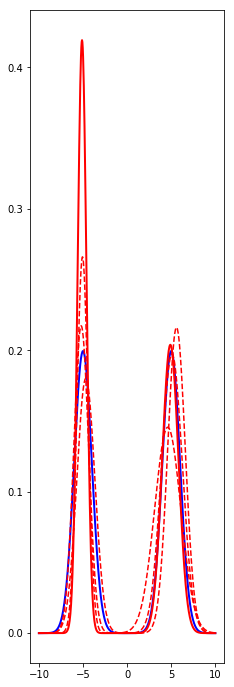

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02840042]: : 16it [00:00, 110.98it/s]

loss=[ 0.00789738]: : 1368it [00:08, 161.27it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00758433]: : 14it [00:00, 83.27it/s] 

loss=[-0.01342916]: : 1091it [00:07, 152.75it/s]


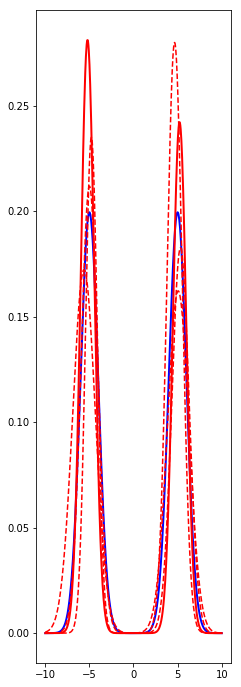

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01609612]: : 14it [00:00, 94.64it/s] 

loss=[-0.00042629]: : 1175it [00:07, 155.02it/s]   


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.0101037]: : 14it [00:00, 94.98it/s]  

loss=[-0.00012374]: : 1100it [00:06, 163.17it/s]   


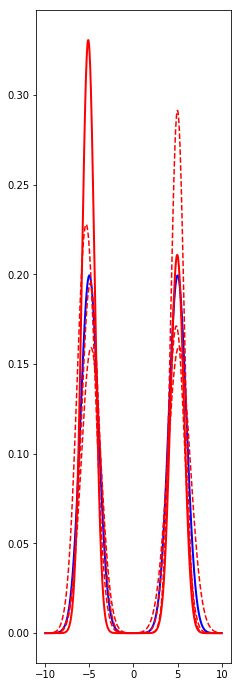

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01182652]: : 15it [00:00, 87.95it/s] 

loss=[ 0.00360107]: : 1148it [00:07, 151.53it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00498176]: : 16it [00:00, 121.91it/s]

loss=[-0.00506854]: : 1105it [00:07, 150.98it/s]


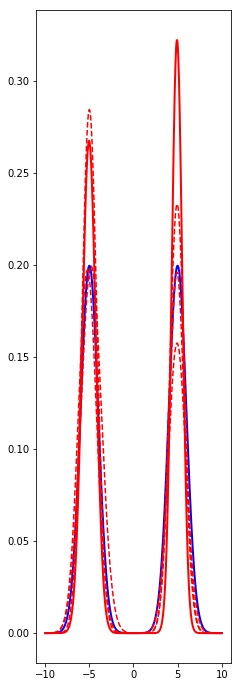

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.03883266]: : 15it [00:00, 89.51it/s] 

loss=[-0.02482319]: : 1168it [00:07, 165.11it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01129103]: : 15it [00:00, 118.83it/s]

loss=[-0.01433182]: : 1114it [00:07, 140.09it/s]


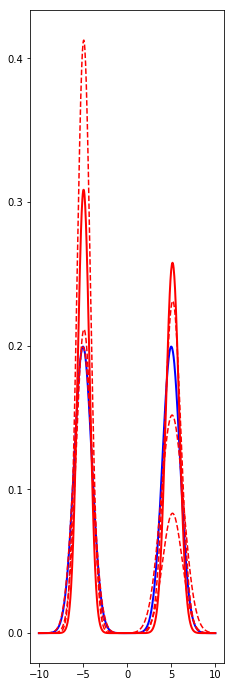

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01207304]: : 15it [00:00, 87.27it/s] 

loss=[-0.00633383]: : 1252it [00:07, 165.26it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.01011777]: : 15it [00:00, 86.65it/s] 

loss=[ 0.00990272]: : 1095it [00:07, 139.24it/s]


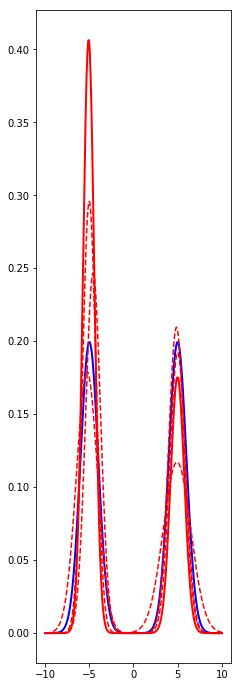

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00361133]: : 17it [00:00, 116.62it/s]

loss=[ 0.00337815]: : 1074it [00:06, 154.27it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00259924]: : 14it [00:00, 82.25it/s] 

loss=[-0.00974846]: : 1152it [00:07, 162.46it/s]


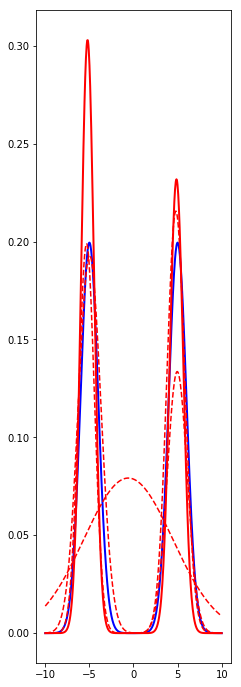

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00481105]: : 18it [00:00, 106.01it/s]     

loss=[-0.00732303]: : 1106it [00:06, 161.89it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00706506]: : 15it [00:00, 88.65it/s] 

loss=[-0.00732422]: : 1104it [00:07, 140.00it/s]


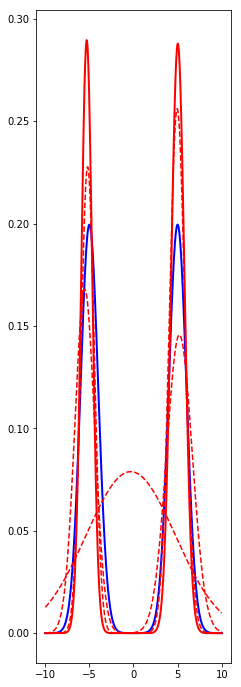

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02769613]: : 15it [00:00, 87.62it/s] 

loss=[ 0.01840854]: : 1112it [00:07, 155.25it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00159025]: : 15it [00:00, 87.02it/s] 

loss=[-0.00034118]: : 1100it [00:07, 140.74it/s]   


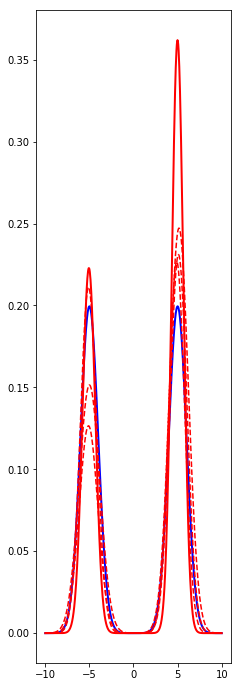

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00656986]: : 18it [00:00, 108.42it/s]     

loss=[-0.01689267]: : 1163it [00:08, 134.34it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00992393]: : 15it [00:00, 87.84it/s] 

loss=[-0.01989365]: : 1115it [00:06, 162.56it/s]


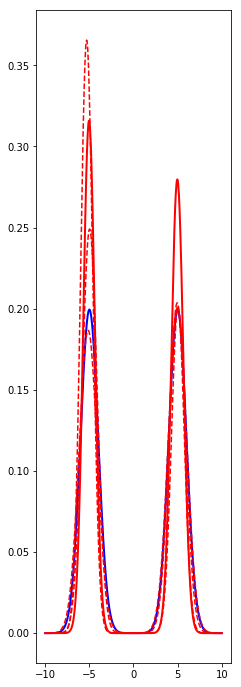

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.02477694]: : 17it [00:00, 99.32it/s] 

loss=[ 0.02450895]: : 1073it [00:06, 154.82it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00023508]: : 17it [00:00, 100.80it/s]

loss=[-0.02389336]: : 1542it [00:09, 155.77it/s]


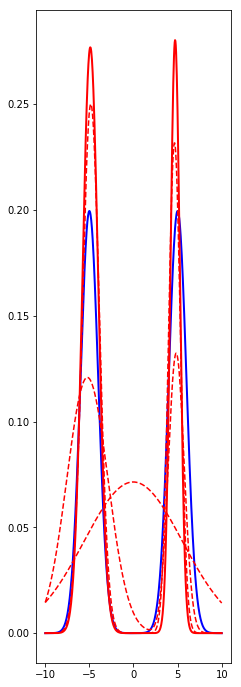

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.05469584]: : 14it [00:00, 82.78it/s] 

loss=[ 0.0428772]: : 1230it [00:07, 153.99it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01245642]: : 15it [00:00, 89.46it/s] 

loss=[-0.01451445]: : 1093it [00:07, 140.35it/s]


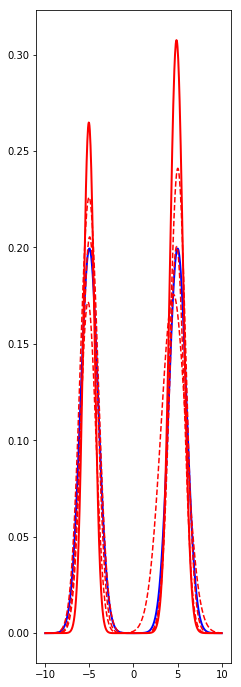

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.00708532]: : 18it [00:00, 121.30it/s]

loss=[-0.00877833]: : 1097it [00:06, 164.73it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.01839209]: : 15it [00:00, 86.88it/s] 

loss=[-0.01873684]: : 1083it [00:07, 153.34it/s]


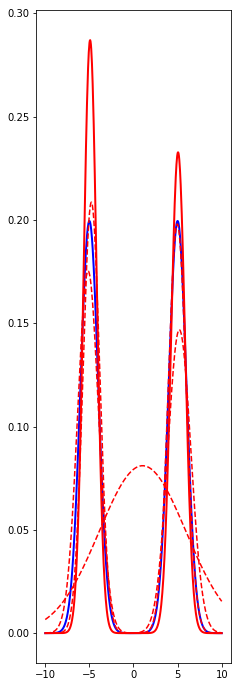

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 1.07941771]: : 17it [00:00, 98.78it/s] 

loss=[ 1.01028824]: : 1449it [00:09, 154.63it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[-0.04535675]: : 16it [00:00, 94.03it/s] 

loss=[-0.07724452]: : 2577it [00:15, 161.40it/s]


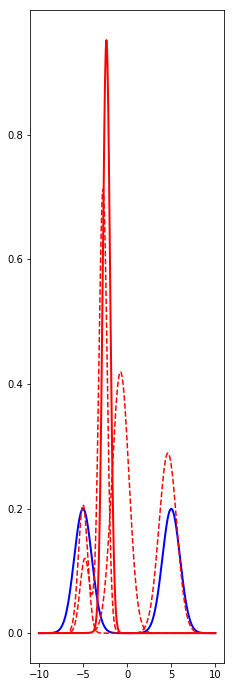

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00861216]: : 15it [00:00, 87.36it/s] 

loss=[ 0.00154281]: : 1126it [00:07, 143.65it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.00617266]: : 15it [00:00, 89.48it/s] 

loss=[-0.00264072]: : 1109it [00:07, 150.37it/s]


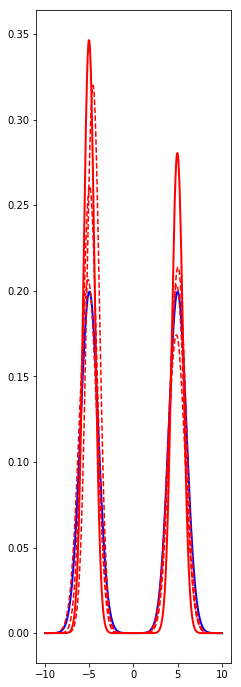

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 0.14050269]: : 0it [00:00, ?it/s]


> /Users/kaan/lfi-experiments/dist_cdelfi/mogtrain.py(295)train()
-> loss.backward()


In [ ]:


seeds = range(90, 140)
n_train = [400, 100, 1000]
rounds = len(n_train)

reinit_weights = True

all_outs_SNPE, all_outs_kSNPE, all_outs_CDELFI, all_outs_DDELFI = [], [], [], []

for seed in seeds:
    
    plt.figure(figsize=(16,12))

    xx = np.linspace(-10, 10, 500).reshape(-1,1)
    
    #"""
    #plt.subplot(1,4,1)
    
    #out = run_panel_b(algo='CDELFI', rounds=rounds, seed=seed, n_train=n_train, 
    #                  reinit_weights=reinit_weights, return_abs=return_abs)
                      
    #plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    #try:
    #    plt.plot(xx,      out['posterior'].eval(xx, log=False), 'k', linewidth=2)
    #except:
    #    tmp = out['posteriors'][-2] if out['posteriors'][-1] is None else out['posteriors'][-1]
    #    plt.plot(xx,      tmp.eval(xx, log=False), 'k')
    #for r in range(rounds):
    #    try:
    #        plt.plot(xx, out['posteriors'][r].eval(xx, log=False), 'k--')
    #    except:
    #        pass
    
    #all_outs_CDELFI.append(out)
    #"""

    #"""
    #plt.subplot(1,4,2)

    #out_SNPE = run_panel_b(algo='SNPE', rounds=rounds, seed=seed, n_train=n_train, 
    #                       reinit_weights=reinit_weights, return_abs=return_abs)
    
    #for r in range(rounds):
    #    w = out_SNPE['train_data'][r][2]
    #    w /= w.sum()
    #    print('ESS:' + str(1/np.sum(w**2)) + '/' + str(w.size))    

    #plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    #plt.plot(xx, out_SNPE['posterior'].eval(xx, log=False), 'r', linewidth=2)
    #for r in range(rounds):
    #    plt.plot(xx, out_SNPE['posteriors'][r].eval(xx, log=False), 'r--')
        
    #all_outs_SNPE.append(out_SNPE)        
    #"""
            
    #plt.subplot(1,4,3)
    
    #out_kSNPE = run_panel_b(algo='kSNPE', rounds=rounds, seed=seed, n_train=n_train,
    #                        reinit_weights=reinit_weights, return_abs=return_abs)
    #for r in range(rounds):
    #    w = out_kSNPE['train_data'][r][2]
    #    w /= w.sum()
    #    print('ESS:' + str(1/np.sum(w**2)) + '/' + str(w.size))
        
    #plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    #plt.plot(xx,out_kSNPE['posterior'].eval(xx, log=False), 'g', linewidth=2)
    #for r in range(rounds):
    #    plt.plot(xx,out_kSNPE['posteriors'][r].eval(xx, log=False), 'g--')
    #if rounds > 1:
    #    print('kernel cov: ', 1./out_kSNPE['log'][-1]['cbkrnl'].A )
    #all_outs_kSNPE.append(out_kSNPE)
    
    #""""""""""""""""""""""""""""""""""""""""
    plt.subplot(1,4,4)

    out_DDELFI = run_panel_b(algo='DDELFI', rounds=rounds, seed=seed, n_train=n_train, 
                           reinit_weights=reinit_weights, return_abs=return_abs)
    
    plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    plt.plot(xx, out_DDELFI['posterior'].eval(xx, log=False), 'r', linewidth=2)
    for r in range(rounds):
        plt.plot(xx, out_DDELFI['posteriors'][r].eval(xx, log=False), 'r--')
        
    all_outs_DDELFI.append(out_DDELFI)        
    
    plt.show()

In [ ]:

np.save('MoG_1D_bimodal_20seeds_5round_N1800_reinitW_results', 
        {'seeds' : seeds, 
         'n_train' : n_train,
         'rounds' : rounds, 
         'reinit_weights' : reinit_weights,
         
         'p_true' : p_true,
         
         'res_CDELFI' : all_outs_CDELFI,
         'res_kSNPE' : all_outs_kSNPE,
         'res_SNPE' : all_outs_SNPE,
         'res_DDELFI' : all_outs_DDELFI,
    })

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,rounds*4))
p = dd.Uniform(lower=[-10], upper=[10], seed=seed)

fail_count_CDELFI = 0
for i in range(len(seeds)):
    
    seed = seeds[i]

    out = all_outs_CDELFI[i]
    out_SNPE = all_outs_SNPE[i]
    out_kSNPE = all_outs_kSNPE[i]
    
    xx = np.linspace(-10, 10, 500).reshape(-1,1)

    broke_flag = False
    for r in range(rounds):
        if rounds > len(n_train) and r < rounds-1:
            r_ = 0
        elif rounds > len(n_train) and r == rounds-1:
            r_ = len(n_train)-1
        else: 
            r_ = r
        plt.subplot(rounds,3,1 + r*3)
        plt.plot(-20, -20, 'b--', linewidth=1.5)
        if r == rounds-1:
            try:
                plt.plot(xx,      out['posteriors'][r].eval(xx, log=False), 'b', linewidth=2)
            except:
                #tmp = out['posteriors'][r-1] if out['posteriors'][-1] is None else out['posteriors'][-1]
                #plt.plot(xx,      tmp.eval(xx, log=False), 'b--')
                broke_flag=True
                fail_count_CDELFI += 1
        else:
            if not out['posteriors'][r] is None:
                plt.plot(xx, out['posteriors'][r].eval(xx, log=False), 'b')
        if r == 0:
            plt.title('CDE-LFI')
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.ylabel('round #' + str(r+1) + '(N=' + str(n_train[r_]) + ')')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
        if broke_flag:
            plt.legend(['fail (' + str( fail_count_CDELFI ) + '/' +  str(len(seeds))  + ')'], loc=1, frameon=False)

        plt.subplot(rounds,3,2 + r*3)
        plt.plot(xx, out_SNPE['posteriors'][r].eval(xx, log=False), 'r', linewidth=2)
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        if r == 0:
            plt.title('SNPE')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')

        plt.subplot(rounds,3,3 + r*3)    
        plt.plot(xx,out_kSNPE['posteriors'][r].eval(xx, log=False), 'g', linewidth=2)
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.plot(xx,                p.eval(xx, log=False), 'k:', linewidth=2)
        if r == 0:
            plt.title('kSNPE')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
        plt.ylabel('round #' + str(r+1) + '(N=' + str(n_train[r_]) + ')')
    plt.suptitle('MoG_1D_bimodal_20seeds_5round_N1800_reinitW')
    plt.savefig('MoG_1D_bimodal_20seeds_5round_N1800_reinitW.pdf')
    
plt.show()

In [ ]:
plt.figure(figsize=(10,16))
trn_data0 = out_kSNPE['train_data'][0]
trn_data  = out_kSNPE['train_data'][1]

m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = p_true
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_datap = g.gen(1000)

plt.subplot(3,2,1)
plt.plot(trn_data0[1] * out_kSNPE['stats_std'] + out_kSNPE['stats_mean'],
         trn_data0[0], 'b.')
plt.axis([0, 12, -10, 10])
plt.xlabel('x')
plt.ylabel('theta')
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.plot([5, 5], [-10, 10], 'k:')
plt.title('joint distribution under prior')

bins = np.linspace(0, 12, 30)
plt.subplot(3,2,2)
plt.hist(trn_data0[1] * out_kSNPE['stats_std'] + out_kSNPE['stats_mean'], bins=bins, normed=True, color='b')
plt.title('histogram of summary statistics')
plt.yticks([])
plt.axis([0, 12, 0, 0.6])
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.plot([5, 5], [0, 0.6], 'k:')
plt.text(7, 0.3, 'avg. |x-xo| : ' + str(np.round( np.mean(np.abs(trn_data0[1]-out_kSNPE['obs']))*100)/100))

plt.subplot(3,2,3)
plt.plot(trn_datap[1],
         trn_datap[0], 'g.')
plt.axis([0, 12, -10, 10])
plt.xlabel('x')
plt.ylabel('theta')
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.plot([5, 5], [-10, 10], 'k:')
plt.title('joint distribution under "final" proposal (=posterior)')

plt.subplot(3,2,4)
plt.title('histogram of summary statistics')
plt.hist(trn_datap[1], bins=bins, normed=True, color='g')
plt.yticks([])
plt.axis([0, 12, 0, 0.6])
plt.plot([5, 5], [0, 0.6], 'k:')
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.text(7, 0.3, 'avg. |x-xo| : ' + str(np.round( np.mean(np.abs(trn_datap[1]-out_kSNPE['obs']))*100)/100))

plt.subplot(3,2,5)
plt.plot(trn_data[1] * out_kSNPE['stats_std'] + out_kSNPE['stats_mean'],
         trn_data[0], 'c.')
plt.axis([0, 12, -10, 10])
plt.xlabel('x')
plt.ylabel('theta')
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.plot([5, 5], [-10, 10], 'k:')
plt.title('joint distribution under actual proposal (round#1)')

plt.subplot(3,2,6)
plt.title('histogram of summary statistics')
plt.hist(trn_data[1]  * out_kSNPE['stats_std'] + out_kSNPE['stats_mean'], bins=bins, normed=True, color='c')
plt.yticks([])
plt.xticks([0, 5, 10], [0, 'xo', 10])
plt.xlabel('x')
plt.plot([5, 5], [0, 0.6], 'k:')
plt.axis([0, 12, 0, 0.6])
plt.text(7, 0.3, 'avg. |x-xo| : ' + str(np.round( np.mean(np.abs(trn_data[1]-out_kSNPE['obs']))*100)/100))

plt.suptitle('MoG_1D_bimodal_summaryStats_prior_proposal')
plt.savefig('MoG_1D_bimodal_summaryStats_prior_proposal.pdf')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,rounds*4))
p = dd.Uniform(lower=[-10], upper=[10], seed=seed)

fail_count_CDELFI = 0
for i in range(len(seeds)):
    
    seed = seeds[i]

    out = all_outs_CDELFI[i]
    out_SNPE = all_outs_SNPE[i]
    out_kSNPE = all_outs_kSNPE[i]
    
    xx = np.linspace(-10, 10, 500).reshape(-1,1)

    broke_flag = False
    for r in range(rounds):
        if rounds > len(n_train) and r < rounds-1:
            r_ = 0
        elif rounds > len(n_train) and r == rounds-1:
            r_ = len(n_train)-1
        else: 
            r_ = r
        plt.subplot(rounds,3,1 + r*3)
        plt.plot(-20, -20, 'b--', linewidth=1.5)
        if r == rounds-1:
            try:
                plt.plot(xx,      out['posteriors'][r].eval(xx, log=False), 'b', linewidth=2)
            except:
                #tmp = out['posteriors'][r-1] if out['posteriors'][-1] is None else out['posteriors'][-1]
                #plt.plot(xx,      tmp.eval(xx, log=False), 'b--')
                broke_flag=True
                fail_count_CDELFI += 1
        else:
            if not out['posteriors'][r] is None:
                plt.plot(xx, out['posteriors'][r].eval(xx, log=False), 'b')
        if r == 0:
            plt.title('CDE-LFI')
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.ylabel('round #' + str(r+1) + '(N=' + str(n_train[r_]) + ')')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
        if broke_flag:
            plt.legend(['fail (' + str( fail_count_CDELFI ) + '/' +  str(len(seeds))  + ')'], loc=1, frameon=False)

        plt.subplot(rounds,3,2 + r*3)
        plt.plot(xx, out_SNPE['posteriors'][r].eval(xx, log=False), 'r', linewidth=2)
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        if r == 0:
            plt.title('SNPE')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')

        plt.subplot(rounds,3,3 + r*3)    
        plt.plot(xx,out_kSNPE['posteriors'][r].eval(xx, log=False), 'g', linewidth=2)
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.plot(xx,                p.eval(xx, log=False), 'k:', linewidth=2)
        if r == 0:
            plt.title('kSNPE')
        plt.axis([-10, 10, 0, 0.5])
        plt.yticks([])
        plt.xticks([-5, 0, 5])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
        plt.ylabel('round #' + str(r+1) + '(N=' + str(n_train[r_]) + ')')
    plt.suptitle('MoG_1D_bimodal_20seeds_5round_N1800_reinitW')
    #plt.savefig('MoG_1D_bimodal_20seeds_5round_N1800_reinitW.pdf')
    
plt.show()

In [ ]:
import theano
import lasagne.layers as ll

r = -1
i = 1
net = all_outs_kSNPE[i]['network']
obs = all_outs_kSNPE[i]['obs']
stats_mean = all_outs_kSNPE[i]['stats_mean']
stats_std  = all_outs_kSNPE[i]['stats_std']
trn_data = all_outs_kSNPE[i]['train_data'][r]

print(net.layer.keys())

cbk_feature_layer = 0
ks = list(net.layer.keys())
hl = net.layer[ks[cbk_feature_layer]]

stat_features = theano.function(
    inputs=[net.stats],
    outputs=ll.get_output(hl))

fstats = stat_features(trn_data[1]).reshape(trn_data[1].shape[0],-1)
obs_z = (obs - stats_mean) / stats_std
fobs_z = stat_features(obs_z).reshape(1,-1)

plt.figure(figsize=(12, 20))
for i in range(fstats.shape[1]):
    plt.subplot(fstats.shape[1]//4+1, 4, i+1)
    plt.hist(fstats[:,i], normed=True)
    plt.plot(fobs_z[0,i], 0.5, 'r*', markerSize=8)
plt.show()


m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_data = g.gen(1000)
plt.subplot(1,3,1)
plt.plot(trn_data[1], trn_data[0], '.')

m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = p_true
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_data = g.gen(1000)
plt.subplot(1,3,2)
plt.plot(trn_data[1], trn_data[0], '.')

m = GaussMixture(dim=1, bimodal=True, return_abs=return_abs, noise_cov=[1.0, 1.0], seed=seed)
p = p_true
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)
trn_data = g.gen(1000)
plt.subplot(1,3,3)
fstats = stat_features((trn_data[1] - stats_mean) / stats_std).reshape(trn_data[1].shape[0],-1)

idx = np.where(trn_data[1]>0)[0]
idxn = np.where(trn_data[1]<=0)[0]
plt.plot(fstats[idx], trn_data[0][idx], 'r.')
plt.plot(fstats[idxn], trn_data[0][idxn], 'm.')

plt.show()

plt.plot(trn_data[1], fstats, '.')
plt.show()

In [ ]:
j, r = 0, 2
w = all_outs_SNPE[j]['train_data'][r][2]
w /= w.sum()
print('ESS raw', 1./np.sum(w**2))

w = all_outs_kSNPE[j]['train_data'][r][2]
w /= w.sum()
print('ESS raw', 1./np.sum(w**2))


In [ ]:
obs = np.array([[0]])

def un_zscore(trn_data_r, seed):
    
    m = GaussMixture(dim=1, noise_cov=[1.0, 0.01], seed=seed)
    p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
    s = ds.Identity()
    g = dg.Default(model=m, prior=p, summary=s)
    
    _,_ = g.gen(1, skip_feedback=True, verbose=False) # DELFI uses this to figure the shape of th, x

    _, stats = g.gen(100, verbose=False)
    stats_mean = np.nanmean(stats, axis=0)
    stats_std = np.nanstd(stats, axis=0)    
    
    return (trn_data_r[1] * stats_std) + stats_mean        
        
def reg_adj(th, x, xo, mu, sig):
                
    return mu(xo) + sig(xo) * (th - mu(x))/sig(x)

thp = p_true.gen(100000)
p_uni = dd.Gaussian(m=-0.11701747*np.ones(1), S=0.65295111*np.eye(1))
plt.figure(figsize=(16,16))

ll_unim = np.zeros(len(seeds))
ll_true = np.zeros(len(seeds))
ll_test = np.zeros(len(seeds))
for i in range(len(seeds)):    
    r = 0
    trn_data = all_outs_SNPE[i]['train_data'][r]

    x = un_zscore(trn_data, seeds[i])

    def mu(x):
        return x
    def sig(x):
        return 1.

    th_ = reg_adj(trn_data[0], x, obs, mu, sig)

    plt.subplot(5,5,i+1)
    plt.hist(th_, bins=np.linspace(-3, 3, 20), normed=True)
    plt.plot(np.linspace(-3, 3, 200), 
             p_true.eval(np.linspace(-3, 3, 200).reshape(200,1),log=False),
             linewidth=2, color='k')
    plt.plot(np.linspace(-3, 3, 200), 
             all_outs_SNPE[i]['posteriors'][r].eval(np.linspace(-3, 3, 200).reshape(200,1),log=False),
             linewidth=2, color='r')
    plt.title('seed ' + str(seeds[i]) + ', round ' + str(r+1))
    
    ll_unim[i] = np.sum(p_uni.eval(th_))
    ll_true[i] = np.sum(p_true.eval(th_))
    ll_test[i] = np.sum(all_outs_SNPE[i]['posteriors'][r].eval(thp))
    
#plt.plot(ll_unim, 'ro-')

plt.subplot(5,1,5)
plt.plot(seeds, ll_true, 'bo-')
plt.ylabel('log-prob under true posterior')
plt.xlabel('#seed')
plt.savefig('MoG_1D_bimodal_20seeds_3round_N1800_20seeds_regAdj_round1.pdf')
plt.show()


plt.plot(ll_test, ll_true, 'bo')
plt.ylabel('log-prob of data under true posterior')
plt.xlabel('log-prob of poster draws under fitted model')
plt.show()

print( np.corrcoef(ll_test, ll_true) )

In [ ]:
import theano
import theano.tensor as tt

idx_good = np.array([2])
idx_bad = np.setdiff1d(np.arange(n_rerun), idx_good)

losses = np.array( [ all_logs[i][-1]['loss'][-1] for i in range(n_rerun)] )
lls = np.zeros_like(losses)


for i in range(n_rerun):
    ll = -tt.mean(all_infs[i].network.lprobs)
    f_eval_ll = theano.function(
            inputs=[all_infs[i].network.params, all_infs[i].network.stats],
            outputs=ll)
    lls[i] = f_eval_ll(all_train_datas[i][0][0], all_train_datas[i][0][1])

xx = np.linspace(-10,10,500).reshape(-1,1)    
    
plt.figure(figsize=(16,9))
plt.subplot(2,4,1)
for i in range(n_rerun):
    if i in idx_bad:
        plt.plot(xx, all_posteriors[i][-1].eval(xx, log=False), 'r')
    else:
        plt.plot(xx, all_posteriors[i][-1].eval(xx, log=False), 'b')
plt.plot(xx, p_true.eval(xx, log=False), 'k')
plt.xlabel('theta')
plt.title('posterior estimates')

plt.subplot(2,4,2)
for i in range(n_rerun):
    xx_ = np.arange(all_logs[i][-1]['loss'].size)[::100]
    if i in idx_bad:
        plt.plot(xx_,all_logs[i][-1]['loss'][::100], 'r')
    else:
        plt.plot(xx_,all_logs[i][-1]['loss'][::100], 'b')
plt.axis([0, all_logs[i][-1]['loss'].size, 0, 5])
plt.title('SVI loss')
plt.xlabel('iteration')

plt.subplot(2,4,3)
plt.plot(idx_bad,  losses[idx_bad], 'ro')
plt.plot(idx_good, losses[idx_good], 'bo')
plt.legend(['fail', 'succes'], loc=1)
plt.axis([-1,21,0, 5])
plt.title('final SVI loss')
plt.xlabel('#seed')

plt.subplot(2,4,4)
plt.plot(idx_bad,  lls[idx_bad], 'ro')
plt.plot(idx_good, lls[idx_good], 'bo')
plt.title('neg. log-likelihood (aka log-loss)')
plt.xlabel('#seed')
plt.axis([-1,21,0, 5])

#plt.subplot(2,5,4)
#plt.plot(idx_bad,  losses[idx_bad] -lls[idx_bad], 'ro')
#plt.plot(idx_good, losses[idx_good]-lls[idx_good], 'bo')
#plt.title('regularizer to prior (aka D_KL-term)')
#plt.axis([-1,21,0, 2.3])
#plt.xlabel('#seed')

xs_ = [np.array([[0]]), 
       np.array([[2]]), 
       np.array([[5]]), 
       np.array([[10]]), 
       np.array([[15]])]

for j in range(len(xs_)):
    
    x_ = xs_[j]
    plt.subplot(2,len(xs_),len(xs_)+j+1)
    
    for i in range(n_rerun):

        pest=all_infs[i].predict(x_)
        if i in idx_bad:
            plt.plot(xx, pest.eval(xx, log=False), 'r')
        else:
            plt.plot(xx, pest.eval(xx, log=False), 'b')
        plt.title('x = ' + str(x_[0,0]))
        plt.xlabel('theta')
        
    if j==0:
        plt.ylabel('conditional densities')

plt.suptitle('signs for multiple optima in MDN final losses fit to 1D bimodal MoG')
#plt.savefig('MoG_1D_bimodal_20seeds_3round_N1800_reinitW_seed93_20repeats_round1_loss_decomposition.pdf')
plt.show()
